# Figure. Power Analysis

In [1]:
import copy
import os
import subprocess

import cdpybio as cpb
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import ciepy
import cardipspy as cpy

%matplotlib inline
%load_ext rpy2.ipython

dy_name = 'figure_power_analysis'
    
outdir = os.path.join(ciepy.root, 'output', dy_name)
cpy.makedir(outdir)

private_outdir = os.path.join(ciepy.root, 'private_output', dy_name)
cpy.makedir(private_outdir)

In [2]:
fn = os.path.join(ciepy.root, 'output', 'gtex_analysis', 'plot_data.tsv')
plotd = pd.read_table(fn, index_col=0)
plotd = plotd.drop('Testis')
fn = os.path.join(ciepy.root, 'output', 'input_data', 'rnaseq_metadata.tsv')
rna_meta = pd.read_table(fn, index_col=0)

In [3]:
sns.set_style('whitegrid')

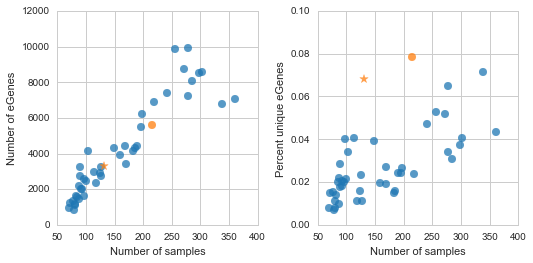

In [4]:
fig,axs = plt.subplots(1, 2, figsize=(7.5, 3.75))
ax = axs[0]
ax.scatter(plotd.ix[plotd.source == 'gtex', 'num_samples'], 
           plotd.ix[plotd.source == 'gtex', 'num_sig_genes'],
           label='GTEx', color=cpb.analysis.tableau20[0], s=60, alpha=0.75)
ax.scatter([plotd.ix['ipsc_unrelateds', 'num_samples']], 
           [plotd.ix['ipsc_unrelateds', 'num_sig_genes']],
           label='iPSC 131 unrelateds', color=cpb.analysis.tableau20[2], alpha=0.75, s=80,
           marker='*')
ax.scatter([plotd.ix['ipsc', 'num_samples']], 
           [plotd.ix['ipsc', 'num_sig_genes']],
           label='iPSC', color=cpb.analysis.tableau20[2], alpha=0.75, s=60)

ax.set_xlabel('Number of samples')
ax.set_ylabel('Number of eGenes')


ax = axs[1]
ax.scatter(plotd.ix[plotd.source == 'gtex', 'num_samples'], 
           plotd.ix[plotd.source == 'gtex', 'percent_distinct_egenes'],
           label='GTEx', color=cpb.analysis.tableau20[0], s=60, alpha=0.75)
ax.scatter([plotd.ix['ipsc_unrelateds', 'num_samples']], 
           [plotd.ix['ipsc_unrelateds', 'percent_distinct_egenes']],
           label='iPSC 131 unrelateds', color=cpb.analysis.tableau20[2], alpha=0.75, s=80,
           marker='*')
ax.scatter([plotd.ix['ipsc', 'num_samples']], 
           [plotd.ix['ipsc', 'percent_distinct_egenes']],
           label='iPSC', color=cpb.analysis.tableau20[2], alpha=0.75, s=60)
ymin,ymax = ax.get_ylim()
ax.set_ylim(0, ymax)

ax.set_xlabel('Number of samples')
ax.set_ylabel('Percent unique eGenes')
#ax.legend(frameon=True, fancybox=True, loc='upper left')
fig.tight_layout()
plt.savefig(os.path.join(outdir, 'egenes_samples_and_distinct.pdf'));

/frazer01/home/cdeboever/software/anaconda/envs/cie/lib/python2.7/site-packages/matplotlib/gridspec.py:302: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


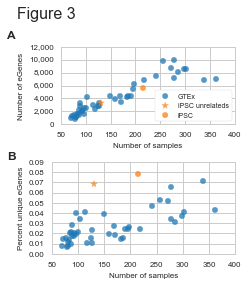

In [5]:
fig = plt.figure(figsize=(3.425, 4), dpi=300)

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.text(0, 0, 'Figure 3',
        size=16, va='bottom')
ciepy.clean_axis(ax)
ax.set_xticks([])
ax.set_yticks([])
gs.tight_layout(fig, rect=[0, 0.90, 0.5, 1])

# Number of eGenes vs. number of samples
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(plotd.ix[plotd.source == 'gtex', 'num_samples'], 
           plotd.ix[plotd.source == 'gtex', 'num_sig_genes'],
           label='GTEx', color=cpb.analysis.tableau20[0], s=30, alpha=0.75)
ax.scatter([plotd.ix['ipsc_unrelateds', 'num_samples']], 
           [plotd.ix['ipsc_unrelateds', 'num_sig_genes']],
           label='iPSC unrelateds', color=cpb.analysis.tableau20[2], alpha=0.75, s=50,
           marker='*')
ax.scatter([plotd.ix['ipsc', 'num_samples']], 
           [plotd.ix['ipsc', 'num_sig_genes']],
           label='iPSC', color=cpb.analysis.tableau20[2], alpha=0.75, s=30)
ax.set_xlabel('Number of samples', fontsize=8)
ax.set_ylabel('Number of eGenes', fontsize=8)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
ax.legend(frameon=True, fancybox=True, fontsize=7, loc='lower right')
ax.yaxis.set_major_formatter(ciepy.comma_format)
gs.tight_layout(fig, rect=[0, 0.45, 1, 0.9])

# Percent distinct eGenes
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(plotd.ix[plotd.source == 'gtex', 'num_samples'], 
           plotd.ix[plotd.source == 'gtex', 'percent_distinct_egenes'],
           label='GTEx', color=cpb.analysis.tableau20[0], s=30, alpha=0.75)
ax.scatter([plotd.ix['ipsc_unrelateds', 'num_samples']], 
           [plotd.ix['ipsc_unrelateds', 'percent_distinct_egenes']],
           label='iPSC 131 unrelateds', color=cpb.analysis.tableau20[2], alpha=0.75, s=50,
           marker='*')
ax.scatter([plotd.ix['ipsc', 'num_samples']], 
           [plotd.ix['ipsc', 'percent_distinct_egenes']],
           label='iPSC', color=cpb.analysis.tableau20[2], alpha=0.75, s=30)
ax.set_xlabel('Number of samples', fontsize=8)
ax.set_ylabel('Percent unique eGenes', fontsize=8)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
#ax.legend(frameon=True, fancybox=True, fontsize=7, loc='upper right')
ymin,ymax = ax.get_ylim()
ax.set_ylim(0, ymax)
gs.tight_layout(fig, rect=[0, 0, 1, 0.5])

t = fig.text(0.005, 0.88, 'A', weight='bold', 
             size=12)
t = fig.text(0.005, 0.46, 'B', weight='bold', 
             size=12)

fig.savefig(os.path.join(outdir, 'power.pdf'))

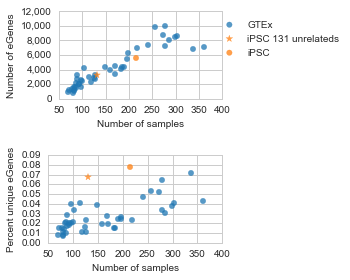

In [6]:
fs = 10

fig = plt.figure(figsize=(6.8, 4), dpi=300)

# Number of eGenes vs. number of samples
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(plotd.ix[plotd.source == 'gtex', 'num_samples'], 
           plotd.ix[plotd.source == 'gtex', 'num_sig_genes'],
           label='GTEx', color=cpb.analysis.tableau20[0], s=30, alpha=0.75)
ax.scatter([plotd.ix['ipsc_unrelateds', 'num_samples']], 
           [plotd.ix['ipsc_unrelateds', 'num_sig_genes']],
           label='iPSC 131 unrelateds', color=cpb.analysis.tableau20[2], alpha=0.75, s=50,
           marker='*')
ax.scatter([plotd.ix['ipsc', 'num_samples']], 
           [plotd.ix['ipsc', 'num_sig_genes']],
           label='iPSC', color=cpb.analysis.tableau20[2], alpha=0.75, s=30)
ax.set_xlabel('Number of samples', fontsize=fs)
ax.set_ylabel('Number of eGenes', fontsize=fs)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(fs)
lgd = ax.legend(loc='upper center', bbox_to_anchor=(1.35, 1))
ax.yaxis.set_major_formatter(ciepy.comma_format)
gs.tight_layout(fig, rect=[0, 0.5, 0.5, 1])

# Percent distinct eGenes
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(plotd.ix[plotd.source == 'gtex', 'num_samples'], 
           plotd.ix[plotd.source == 'gtex', 'percent_distinct_egenes'],
           label='GTEx', color=cpb.analysis.tableau20[0], s=30, alpha=0.75)
ax.scatter([plotd.ix['ipsc_unrelateds', 'num_samples']], 
           [plotd.ix['ipsc_unrelateds', 'percent_distinct_egenes']],
           label='iPSC 131 unrelateds', color=cpb.analysis.tableau20[2], alpha=0.75, s=50,
           marker='*')
ax.scatter([plotd.ix['ipsc', 'num_samples']], 
           [plotd.ix['ipsc', 'percent_distinct_egenes']],
           label='iPSC', color=cpb.analysis.tableau20[2], alpha=0.75, s=30)
ax.set_xlabel('Number of samples', fontsize=fs)
ax.set_ylabel('Percent unique eGenes', fontsize=fs)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(fs)
#ax.legend(frameon=True, fancybox=True, fontsize=fs, loc='upper right')
ymin,ymax = ax.get_ylim()
ax.set_ylim(0, ymax)
gs.tight_layout(fig, rect=[0, 0, 0.5, 0.5])

fig.savefig(os.path.join(outdir, 'power_presentation.pdf'))